In [1]:
import matplotlib.pyplot as plt
from random import randint
INF = 999999

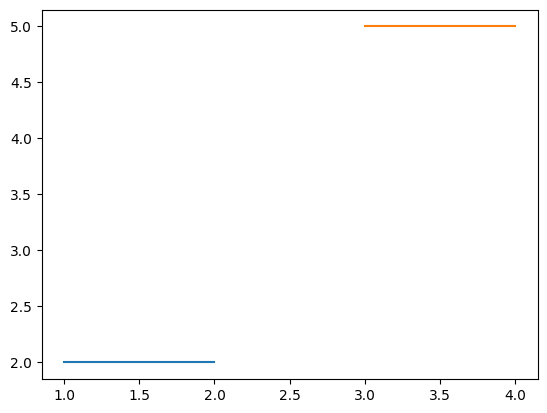

In [2]:
plt.plot([1, 2], [2, 2], [3, 4], [5, 5])

plt.show()

# Global variable

In [3]:
width = 20 
height = 20 

In [4]:
edge_hor = [[randint(0, 1) for i in range(width-1)] for i in range(height)]
edge_ver = [[randint(0, 1) for i in range(width)] for i in range(height-1)]

# edge_hor, edge_ver


# Graphical visulaization

In [5]:
def graphics(edge_hor, edge_ver):
    tree_list = []
    for i, edges in enumerate(edge_hor):
        for j, edge in enumerate(edges):
            if edge == 1:
                tree_list.extend(([j+1, j+2], [height-i, height-i]))

    for i, edges in enumerate(edge_ver):
        for j, edge in enumerate(edges):
            if edge == 1:
                tree_list.extend(([j+1, j+1], [height-i, height-i-1]))
    for i in range(0, len(tree_list), 2):
        plt.plot(tree_list[i], tree_list[i+1], 'b')
    plt.show()

In [6]:
vertices = [[i for i in range(j, j+width)] for j in range(0, width*height, width)]
# vertices

In [7]:
edge_hor = [[randint(0, 99) for i in range(width-1)] for i in range(height)]
edge_ver = [[randint(0, 99) for i in range(width)] for i in range(height-1)]

# edge_hor, edge_ver 

In [8]:
max_edge = width*height - 1

edge_hor_result = [[0 for j in range(width-1)] for i in range(height)]
edge_ver_result = [[0 for j in range(width)] for i in range(height-1)]

# Spanning tree

Not working

In [9]:
visited_veritces = []
visited_veritces.append(vertices[0][0])
x, y = 0, 0
x_temp, y_temp = 0, 0
shifted = 0
while len(visited_veritces) < max_edge:
# for j in range(40):
   for i in range(max_edge):
      min = INF
      x_temp, y_temp = x, y
      surrounding = 0
      if x-1 < 0 or vertices[x-1][y] in visited_veritces:
         surrounding += 1
      if x >= height-1 or vertices[x+1][y] in visited_veritces:
         surrounding += 1
      if y-1 < 0 or vertices[x][y-1] in visited_veritces:
         surrounding += 1
      # print(x, y+1)
      if y >= width-1 or vertices[x][y+1] in visited_veritces:
         surrounding += 1

      # print("surrounding == ", surrounding)
      # print("vertices == ", x, y)
      
        
      if (x-1 >= 0) and edge_ver[x-1][y] < min and vertices[x-1][y] not in visited_veritces:
         # print("t")
         y_temp = y
         x_temp = x-1  
         min = edge_ver[x-1][y]
      if (x < height-1) and edge_ver[x][y] < min and vertices[x+1][y] not in visited_veritces:
         # print("b  ", edge_ver[x][y])
         y_temp = y
         x_temp = x+1
         min = edge_ver[x][y]
         # print("bottom",vertices[x+1][y])
      if (y-1 >= 0) and edge_hor[x][y-1] < min and vertices[x][y-1] not in visited_veritces:
         # print("l")
         y_temp = y-1
         x_temp = x
         min = edge_hor[x][y-1]
      if (y < width-1) and edge_hor[x][y] < min and vertices[x][y+1] not in visited_veritces:
         # print("r  ", edge_hor[x][y])
         y_temp = y+1
         x_temp = x
         min = edge_hor[x][y]

      if surrounding == 4:
         # print(x, y)
         # print(x_temp, y_temp)
         if shifted > 0:
            shifted = 0
            if x-1 >= 0:
               edge_ver_result[x-1][y] = 1
            elif x < width-1:
               edge_ver_result[x][y] = 1
            elif y >= 0:
               edge_hor_result[x][y-1] = 1
            elif y < height-1:
               edge_hor_result[x][y] = 1


         if vertices[x][y] not in visited_veritces:
            # print("surrounding::::::", vertices[x][y])
            visited_veritces.append(vertices[x][y])

      if x == x_temp and y == y_temp:
         break

      # print(vertices[x_temp][y_temp], x_temp, y_temp)
      if x == x_temp:
         if y == y_temp+1:
            edge_hor_result[x][y-1] = 1
         else:
            edge_hor_result[x][y] = 1
      if y == y_temp:
         if x == x_temp+1:
            edge_ver_result[x-1][y] = 1
         else:
            edge_ver_result[x][y] = 1

      x, y = x_temp, y_temp
      
      visited_veritces.append(vertices[x_temp][y_temp])
   
   for i in range(height):
      a = 0
      for j in range(width):
         if vertices[i][j] not in visited_veritces:
            x, y = i, j
            shifted = 1
            a = 1
            break
      if a == 1:
         break
   

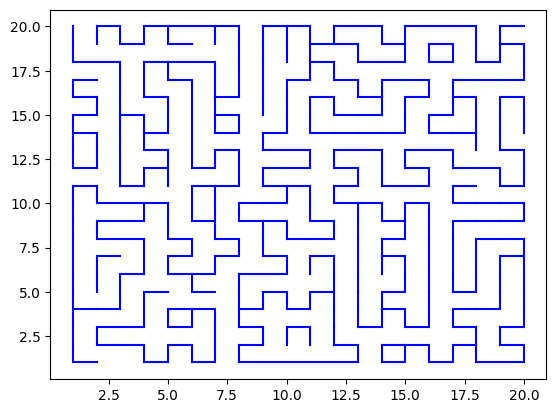

In [10]:
graphics(edge_hor= edge_hor_result, edge_ver= edge_ver_result)

In [11]:
visited_veritces.sort()
# print(visited_veritces)

In [12]:
ver = [
    [1, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 1]
]
hor = [
    [1, 1, 1, 1 ,1],
    [1, 1, 0, 0, 1],
    [1, 0, 0, 1, 1]
]
# graphics(edge_hor= hor, edge_ver= ver)

In [13]:
ver = edge_ver_result
hor = edge_hor_result
ver = list(map(lambda v: list(map(lambda x: 0 if x == 1 else 1, v)), ver))
hor = list(map(lambda v: list(map(lambda x: 0 if x == 1 else 1, v)), hor))

# ver, hor

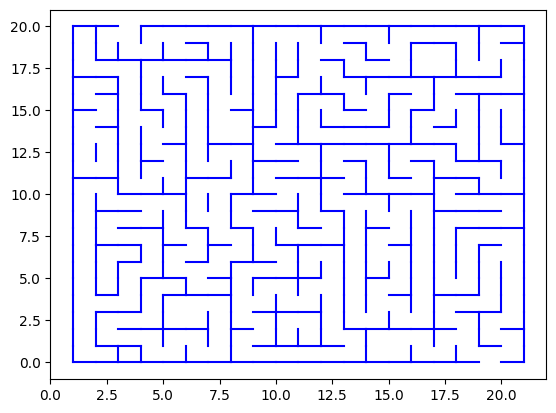

In [14]:
boundary_start = [0 if i==2 else 1 for i in range(width)]
boundary_end = [0 if i==width-2 else 1 for i in range(width)]
ver.insert(0, boundary_start)
ver.append(boundary_end)
hor_temp = []

for h in hor:
    h.insert(0, 1)
    h.append(1)
    hor_temp.append(h)

# hor = list(map(lambda h: h.insert(0, 1), hor))
# hor = list(map(lambda h: h.append(1), hor))
graphics(edge_hor=ver, edge_ver=hor_temp)